In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Toxicity_analysis_neural

/content/drive/MyDrive/Toxicity_analysis_neural


In [3]:
!pip install matplotlib-venn

# Importing the dataset visualization preprocessing

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as  sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib_venn as venn

color = sns.color_palette()
sns.set_style('dark')
%matplotlib inline


In [5]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
X_train = train_data["comment_text"]
X_train

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."
...,...
159566,""":::::And for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...


In [8]:
y_train = train_data.iloc[:,2:]
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [9]:
y_train[y_train["toxic"] == 1]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,1,1,1,0,1,0
12,1,0,0,0,0,0
16,1,0,0,0,0,0
42,1,0,1,0,1,1
43,1,0,1,0,1,0
...,...,...,...,...,...,...
159494,1,0,1,0,1,1
159514,1,0,0,0,1,0
159541,1,0,1,0,1,0
159546,1,0,0,0,1,0


Checking the count of the various types of words

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train is a DataFrame and cols is a list of column names
# Define `cols` as the columns you want to sum, e.g., specific comment types
cols = ['comment_type_1', 'comment_type_2', 'comment_type_3']  # Modify with actual column names

# Compute the sum of values for each comment type
val_counts = y_train[cols].sum()

# Plotting
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)

plt.title("Comments per Classes")
plt.xlabel("Various Comments Type")
plt.ylabel("Counts of the Comments")

# Adding the data labels on the bars
rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha="center", va="bottom")

plt.show()


KeyError: "None of [Index(['comment_type_1', 'comment_type_2', 'comment_type_3'], dtype='object')] are in the [columns]"

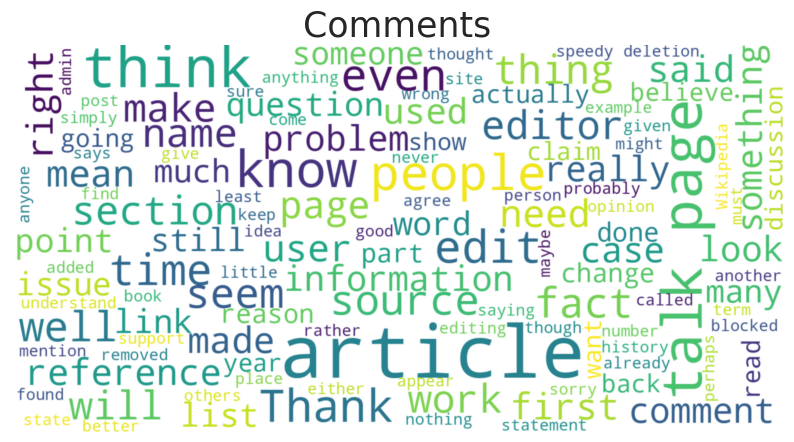

In [13]:
#from wordcloud import WordCloud
words = ' '.join([text for text in X_train])


word_cloud = WordCloud(
                       width=1600,
                       height=800,
                       #colormap='PuRd',
                       margin=0,
                       max_words=600, # Maximum numbers of words we want to see
                       min_word_length=4, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white").generate(words)

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('Comments', fontsize = 25)
plt.axis("off")
plt.show()